# Plotting

**Prerequisites**

- {doc}`Introduction to Numpy <numpy_arrays>`

**Outcomes**

- Understand components of matplotlib plots
- Make basic plots


```{literalinclude} ../_static/colab_light.raw
```

## Visualization

One of the most important outputs of your analysis will be the visualizations that you choose to
communicate what you've discovered.

Here are what some people -- whom we think have earned the right to an opinion on this
material -- have said with respect to data visualizations.

> I spend hours thinking about how to get the story across in my visualizations. I don't mind taking that long because it's that five minutes of presenting it or someone getting it that can make or break a deal -- Goldman Sachs executive





We won't have time to cover "how to make a compelling data visualization" in this lecture.

Instead, we will focus on the basics of creating visualizations in Python.

This will be a fast introduction, but this material appears in almost every
lecture going forward, which will help the concepts sink in.

In almost any profession that you pursue, much of what you do involves communicating ideas to others.

Data visualization can help you communicate these ideas effectively, and we encourage you to learn
more about what makes a useful visualization.

We include some references that we have found useful below.

* [The Functional Art: An introduction to information graphics and visualization](https://www.amazon.com/The-Functional-Art-introduction-visualization/dp/0321834739/) by Alberto Cairo
* [The Visual Display of Quantitative Information](https://www.amazon.com/Visual-Display-Quantitative-Information/dp/1930824130) by Edward Tufte
* [The Wall Street Journal Guide to Information Graphics: The Dos and Don'ts of Presenting Data, Facts, and Figures](https://www.amazon.com/Street-Journal-Guide-Information-Graphics/dp/0393347281) by Dona M Wong
* [Introduction to Data Visualization](http://paldhous.github.io/ucb/2016/dataviz/index.html)

## `matplotlib`

The most widely used plotting package in Python is matplotlib.

The standard import alias is

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Note above that we are using `matplotlib.pyplot` rather than just `matplotlib`.

`pyplot` is a sub-module found in some large packages to further organize functions and types. We are able to give the `plt` alias to this sub-module.

Additionally, when we are working in the notebook, we need tell matplotlib to display our images
inside of the notebook itself instead of creating new windows with the image.

This is done by

In [2]:
%matplotlib inline

The commands with `%` before them are called [Magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

### First Plot

Let's create our first plot!

After creating it, we will walk through the steps one-by-one to understand what they do.

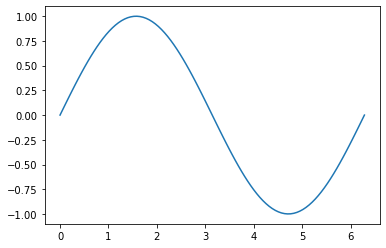

In [3]:
# Step 1
fig, ax = plt.subplots()

# Step 2
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# Step 3
ax.plot(x, y)

1. Create a figure and axis object which stores the information from our graph.
1. Generate data that we will plot.
1. Use the `x` and `y` data, and make a line plot on our axis, `ax`, by calling the `plot` method.

### Difference between Figure and Axis

We've found that the easiest way for us to distinguish between the figure and axis objects is to
think about them as a framed painting.

The axis is the canvas; it is where we "draw" our plots.

The figure is the entire framed painting (which inclues the axis itself!).

We can also see this by setting certain elements of the figure to different colors.

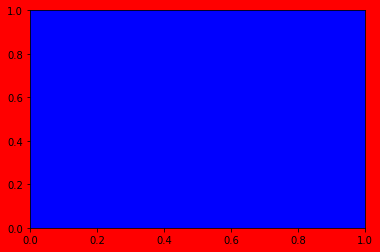

In [4]:
fig, ax = plt.subplots()

fig.set_facecolor("red")
ax.set_facecolor("blue")

This difference also means that you can place more than one axis on a figure.

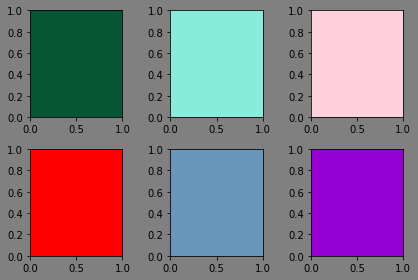

In [5]:
# We specified the shape of the axes -- It means we will have two rows and three columns
# of axes on our figure
fig, axes = plt.subplots(2, 3)

fig.set_facecolor("gray")

# Can choose hex colors
colors = ["#065535", "#89ecda", "#ffd1dc", "#ff0000", "#6897bb", "#9400d3"]

# axes is a numpy array and we want to iterate over a flat version of it
for (ax, c) in zip(axes.flat, colors):
    ax.set_facecolor(c)

fig.tight_layout()

### Functionality

The matplotlib library is versatile and very flexible.

You can see various examples of what it can do on the
[matplotlib example gallery](https://matplotlib.org/gallery.html).

We work though a few examples to quickly introduce some possibilities.

**Bar**

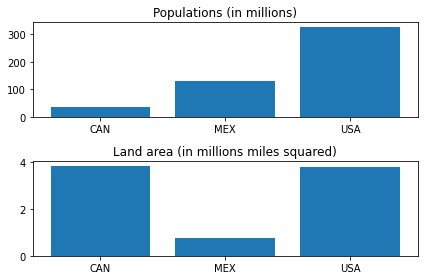

In [6]:
countries = ["CAN", "MEX", "USA"]
populations = [36.7, 129.2, 325.700]
land_area = [3.850, 0.761, 3.790]

fig, ax = plt.subplots(2)

ax[0].bar(countries, populations, align="center")
ax[0].set_title("Populations (in millions)")

ax[1].bar(countries, land_area, align="center")
ax[1].set_title("Land area (in millions miles squared)")

fig.tight_layout()

**Scatter and annotation**

Text(25, -25, 'First point')

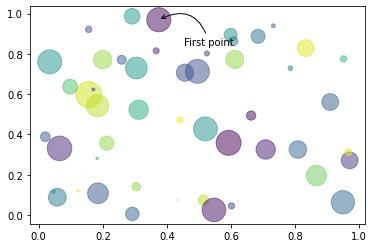

In [7]:
N = 50

np.random.seed(42)

x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

fig, ax = plt.subplots()

ax.scatter(x, y, s=area, c=colors, alpha=0.5)

ax.annotate(
    "First point", xy=(x[0], y[0]), xycoords="data",
    xytext=(25, -25), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.6")
)

**Fill between**

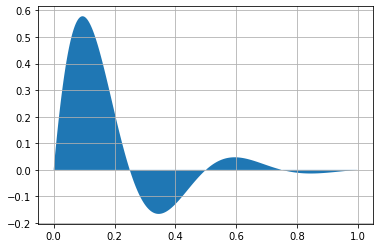

In [8]:
x = np.linspace(0, 1, 500)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

fig, ax = plt.subplots()

ax.grid(True)
ax.fill(x, y)